## Содержание:
* [1. Подготовка данных](#section_1)

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})

In [2]:
# init_df - датафрейм в исходном виде
init_df = pd.read_csv('datasets/games.csv')

# df - датафрейм для преобразований
df = pd.read_csv('datasets/games.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Шаг 1. Подготовка данных.  <a class="anchor" id="section_1"></a>

In [4]:
# Привожу названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Год выпуска не указан менее чем в 2% случаев, тратить время на их заполнение неэффективно. А вот с `user_score` придется поразбираться:

In [6]:
# Строки с подозриельтым значением
df[df['user_score']=='tbd'].shape

(2424, 11)

Интернет сообщает, что отметка `tbd` выставляется в рейтенге у игр, на которые еще не собрано достаточно отзывов. Заменю эти значения на NaN, поскольку они ненесут для меня полезной информации:

In [7]:
# Преобразую в числовой тип
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Преобразую в целочисленный
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Проверка
print(df['user_score'].dtype, df['year_of_release'].dtype)

float64 Int64


In [8]:
# Cуммарные продажи во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

# Проверка
df[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].head()

,na_sales,eu_sales,jp_sales,total_sales
0,41.36,28.96,3.77,74.09
1,29.08,3.58,6.81,39.47
2,15.68,12.76,3.79,32.23
3,15.61,10.93,3.28,29.82
4,11.27,8.89,10.22,30.38


- Названия колонок приведены к нижнему регистру
- В колонке 'user_score' значения `tbd` заменены на NaN, а тип данных на float64
- Тип данных 'year_of_release' теперь целочисленный, так будет удобно строить гистограммы
- Отметка `tbd` выставляется в рейтенге у игр, на которые еще не собрано достаточно отзывов
- Вычислены суммарные продажи во всех регионах

#### Статистика по годам

_Количество выпущенных игр_

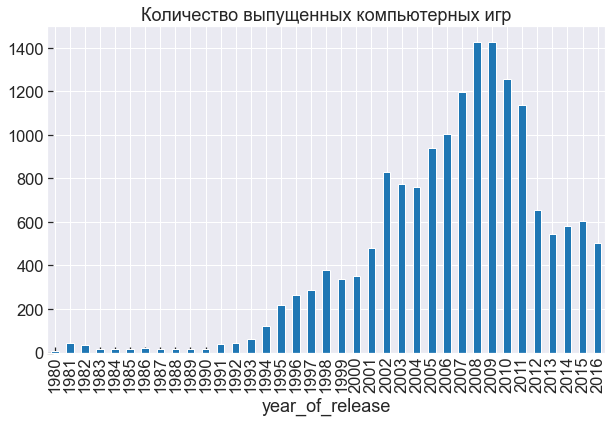

In [9]:
df.groupby('year_of_release')['name'].count().plot.bar()

plt.title('Количество выпущенных компьютерных игр')

plt.show()

- Игры, выпущенные раньше 1991 года, можно будет объеденить в одну группу. Их количество исчезающе мало по сравнению с периодом после. Наблюдается подозрительный спад количества выпускаемых игр начиная с 2009 года. Предположительно это связано с развитием индустрии мобильных игр.

_Продажи на разных платформах_

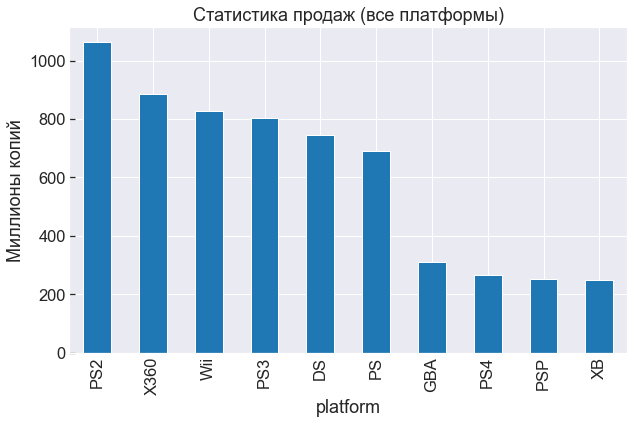

In [10]:
# Выберите платформы с наибольшими суммарными продажами
top_sales_platforms = df.groupby('platform')['total_sales'].sum().nlargest(10)

plt.ylabel('Миллионы копий')

plt.title('Статистика продаж (все платформы)')

top_sales_platforms.plot.bar()

plt.show()

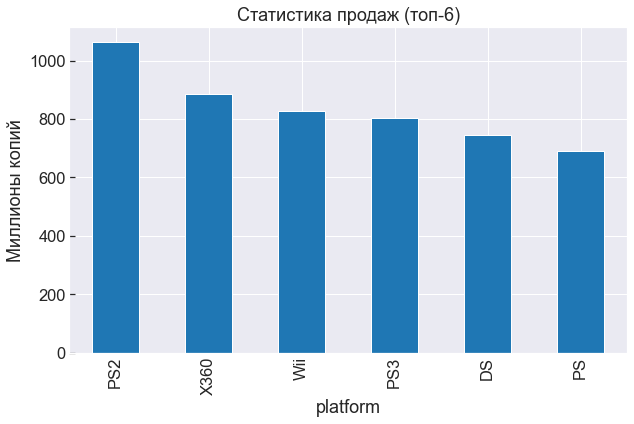

In [11]:
# Ограничусь шестью самыми крупными по прадажам
top_sales_platforms = df.groupby('platform')['total_sales'].sum().nlargest(6)

plt.ylabel('Миллионы копий')
plt.title('Статистика продаж (топ-6)')

top_sales_platforms.plot.bar()

plt.show()

In [12]:
top_names = list(top_sales_platforms.index)

# Добавляю PC для сравнения
top_names.append('PC')

print(top_names)

top_sales_df = df[df['platform'].isin(top_names)]

top_sales_df.shape

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'PC']


(10396, 12)

In [13]:
top_sales_groups = top_sales_df.groupby(['platform', 'year_of_release'])['total_sales'].agg(('sum'))

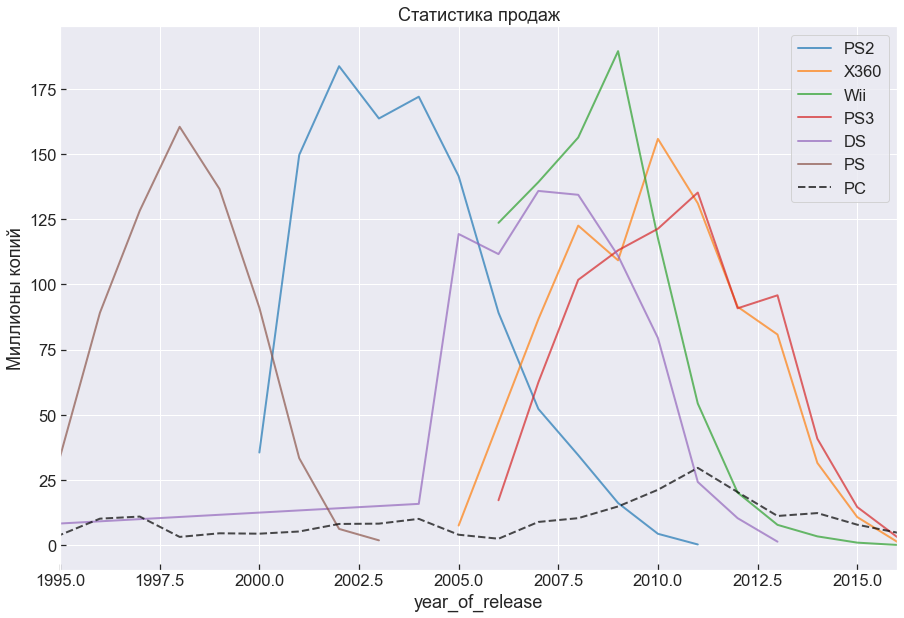

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))

for platform_name in top_sales_platforms.index:

    stat_df = top_sales_groups.loc[[platform_name]].reset_index(level=0, drop=True)

    stat_df.plot(ax=ax, alpha=.7, lw=2, label=platform_name)

stat_df = top_sales_groups.loc[['PC']].reset_index(level=0, drop=True)
stat_df.plot(ax=ax, alpha=.7, lw=2, label='PC', color='k', ls='--')

plt.ylabel('Миллионы копий')
plt.title('Статистика продаж')

plt.xlim(1995, 2016)
plt.legend()
plt.show()

- Актуальный период, данные за который помогут построить прогноз на 2017 год: 2005 - 2016
> Обоснование: в указанный период времени появляются четыре новые игровые платформы, наблюдается всплеск продаж копий игр на ПК (в районе 2011 года). До 2005 года игровой рынок можно считать "незрелым" (существуют всего две заметные игровые платформы), поэтому данные по этому периоду я не буду принимать во внимание в дальнейшем. Тем не менее, данные даже за этот период согласуются с утверждением о том, что

- Характерный срок, за который возникают и исчезают платформы состовляет около семи лет

***

***

In [24]:
# Данные для формирования прогноза на 2017 год

limit_year = 2012

predict_df = df[df['year_of_release'] >= limit_year]

predict_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,11.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


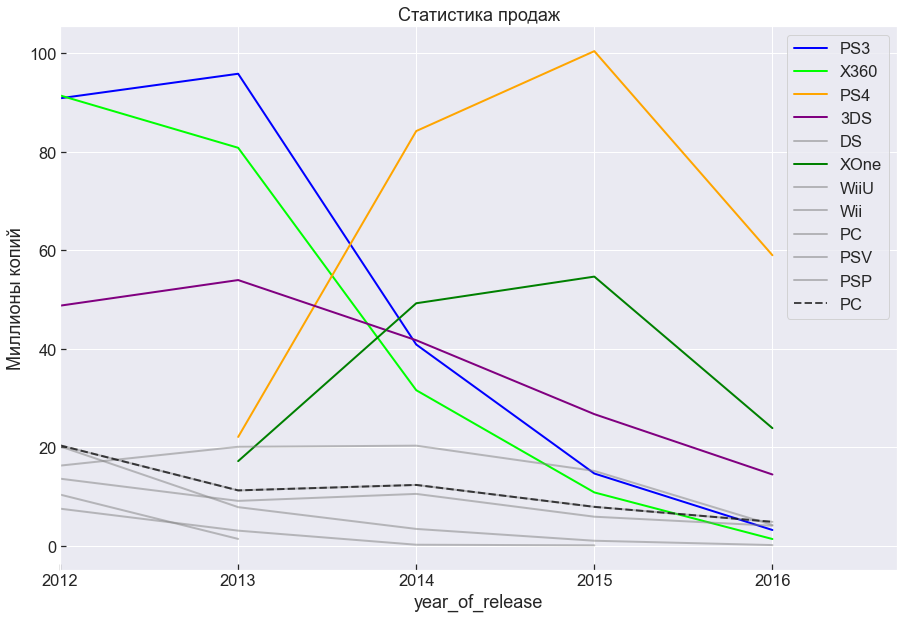

In [99]:
predict_stat_df = predict_df.groupby(['platform', 'year_of_release'])['total_sales'].agg(('sum'))

colors = ['blue', 'lime', 'orange', 'purple', 'green']

fig, ax = plt.subplots(figsize=(15, 10))

# Счетчик
i = 0

for platform_name in predict_df['platform'].unique():

    stat_df = predict_stat_df.loc[[platform_name]].reset_index(level=0, drop=True)
    stat_df = pd.DataFrame(stat_df)

    if stat_df['total_sales'].max() < 40:
        color='grey'
        alpha = .5
    else:
        color = colors[i]
        i+=1
        alpha = 1

    ax.plot(stat_df, lw=2, color=color, alpha=alpha, label=platform_name)
    ax.legend()


stat_df = predict_stat_df.loc[['PC']].reset_index(level=0, drop=True)
stat_df.plot(ax=ax, alpha=.7, lw=2, label='PC', color='k', ls='--')

ax.legend()

plt.ylabel('Миллионы копий')
plt.title('Статистика продаж')

plt.xlim(limit_year, 2016.7)
plt.legend()
plt.show()